In [458]:
import random
import copy
import statistics

In [459]:
# n = 4
# t = 0.5
# edges = [[0, 1, [1, 1, 1]], [0, 2, [1, 1, 0]], [0, 3, [0, 1, 0]], [1, 0, [0, 0, 0]], [1, 2, [0, 0, 0]], [1, 3, [0, 0, 1]], [2, 0, [0, 0, 0]],
#          [2, 1, [0, 0, 0]], [2, 3, [1, 0, 0]], [3, 0, [0, 0, 0]], [3, 1, [0, 0, 0]], [3, 2, [0, 0, 1]]]
# random.shuffle(edges)

In [460]:
n = 10
t = 0.5
mm = 10
pc = 0
num = 10
edges = [[x,y,[pc for i in range(mm)]] for x in range(n) for y in range(n) if x!=y]
ran = [i for i in range(len(edges))]
for i in range(mm):
    random.shuffle(ran)
    for j in range(num):
        edges[ran[j]][2][i] += 1
random.shuffle(edges)

In [461]:
edges

[[7, 9, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [3, 9, [0, 0, 0, 1, 0, 0, 1, 1, 0, 0]],
 [0, 3, [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]],
 [5, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [5, 1, [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]],
 [8, 1, [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 [0, 7, [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]],
 [1, 5, [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]],
 [4, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [6, 9, [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]],
 [6, 1, [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [6, 4, [1, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
 [5, 7, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],
 [4, 7, [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]],
 [3, 6, [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [6, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [6, 5, [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [0, 8, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [1, 0, [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 [9, 2, [1, 0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [9, 6, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],
 [0, 5, [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
 [1, 7, [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
 [8, 4, [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 [2, 6, [0, 0, 0

In [462]:
g = list()
for i in range(n):
    g.append(list())
for temp in edges:
    g[temp[0]].append(temp[1])
w = {}
for temp in edges:
    w[(temp[0],temp[1])] = temp[2].copy()

In [463]:
def dp(x,y,g,w):
    s = sum(w[(x,y)])
    # print(x,y,w)
    for i in range(len(w[(x,y)])):
        for z in g[y]:
            if z==x or z==y: continue
            w[(x,y)][i] += max(w[(y,z)][i], t*max(w[(y,z)]))
    ns = sum(w[(x,y)])
    # print(x,y,w)
    if ns!=0:
        for i in range(len(w[(x,y)])):
            w[(x,y)][i] *= (s/ns)
    # print(x,y,w)
    return

In [464]:
err = []
prev = []
mid = []
more_mid = []
erm = []
z = [w[key].copy() for key in sorted(w.keys())]
for j in range(10):
    for temp in edges: dp(temp[0],temp[1],g,w)
    sm = 0
    cur = [w[key].copy() for key in sorted(w.keys())]
    mid.append(w[(9,7)][0])
    more_mid.append(w[(9,7)][1])
    std=0
    for l in list(w.values()):
        std += statistics.stdev(l)
    erm.append(std)
    if j==0: f = [w[key].copy() for key in sorted(w.keys())]
    if j!=0:
        for i in range(len(cur)):
            for m in range(len(cur[0])):
                sm += (cur[i][m] - prev[i][m])**2
        err.append(round(sm,4))
    prev = copy.deepcopy(cur)
print(err)

[0.4519, 0.0542, 0.0053, 0.0006, 0.0001, 0.0, 0.0, 0.0, 0.0]


In [465]:
mid

[0.1620862769857033,
 0.19150527706726694,
 0.20462918958485946,
 0.20769825088404995,
 0.20833742346412867,
 0.2084610722332369,
 0.2084773458973689,
 0.20847687632625864,
 0.20847581385377315,
 0.20847539559582526]

In [466]:
more_mid

[0.3265512222688304,
 0.24126490048122265,
 0.21007229280135534,
 0.20087179601617167,
 0.19868065446053743,
 0.19819426477080204,
 0.19809489991898735,
 0.1980774569380737,
 0.19807522825728768,
 0.19807527271176031]

In [467]:
erm

[2.1644026861044257,
 0.7920990106383207,
 0.4138923307301412,
 0.35738838247106935,
 0.35137279106517433,
 0.3511561914698944,
 0.3512597121931071,
 0.35131001863393535,
 0.3513297475586117,
 0.35133704216138084]

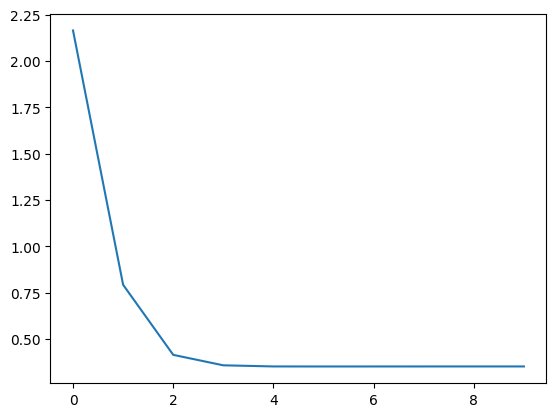

In [468]:
import matplotlib.pyplot as plt
plt.plot(range(len(erm)), erm)

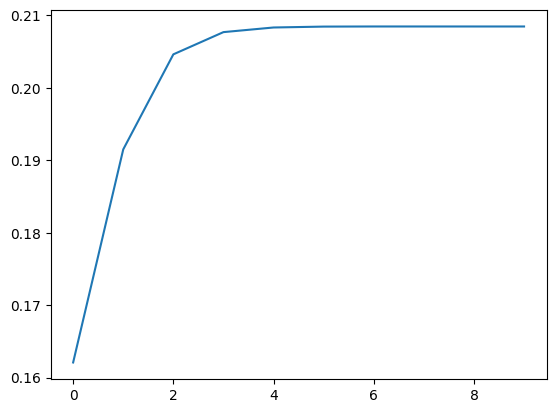

In [469]:
import matplotlib.pyplot as plt
plt.plot(range(len(mid)), mid)

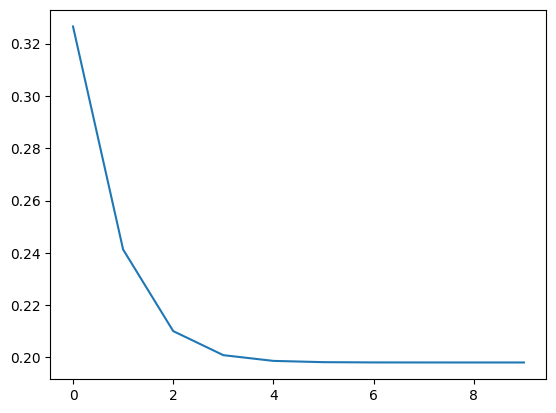

In [470]:
import matplotlib.pyplot as plt
plt.plot(range(len(more_mid)), more_mid)

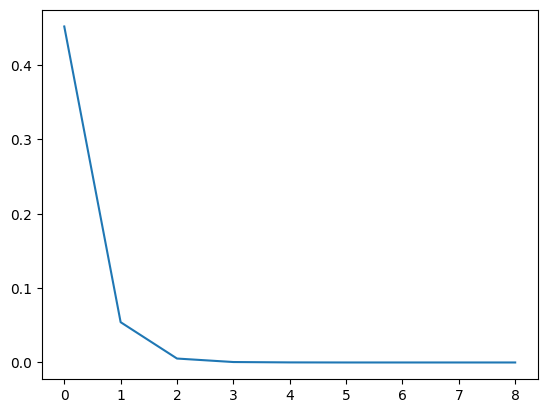

In [471]:
import matplotlib.pyplot as plt
plt.plot(range(len(err)), err)

In [472]:
sorted(edges)

[[0, 1, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],
 [0, 2, [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
 [0, 3, [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]],
 [0, 4, [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]],
 [0, 5, [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
 [0, 6, [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]],
 [0, 7, [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]],
 [0, 8, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [0, 9, [0, 1, 0, 0, 0, 1, 0, 0, 0, 0]],
 [1, 0, [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 [1, 2, [0, 0, 0, 0, 1, 0, 1, 0, 0, 0]],
 [1, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [1, 4, [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 [1, 5, [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]],
 [1, 6, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [1, 7, [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
 [1, 8, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [1, 9, [1, 0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [2, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [2, 1, [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]],
 [2, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [2, 4, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [2, 5, [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
 [2, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [2, 7, [0, 0, 1

In [473]:
z

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0,

In [474]:
f

[[0.12275014664567317,
  0.12279131034340814,
  0.08876951416545747,
  0.08449878052545459,
  0.12216356395294989,
  0.08516769061364783,
  0.10301729904397311,
  0.10180296996079156,
  0.08449878052545459,
  0.08453994422318957],
 [0.1096586107337433,
  0.0869649481453334,
  0.1496184666713769,
  0.10960057114020473,
  0.08786017632163502,
  0.08696003265838653,
  0.10772831546298713,
  0.087786117754,
  0.08695328507504427,
  0.08686947603728869],
 [0.28,
  0.32,
  0.24,
  0.32,
  0.4622222222222222,
  0.24296296296296296,
  0.24888888888888885,
  0.362962962962963,
  0.277037037037037,
  0.24592592592592594],
 [0.16289118099082883,
  0.16133239439892752,
  0.22581464632902748,
  0.17345255035505253,
  0.15944360061918955,
  0.22176180250675587,
  0.1635165475264334,
  0.28227855383529676,
  0.2884578216626495,
  0.16105090177583856],
 [0.08638109734000143,
  0.10547220410234108,
  0.10392839022976008,
  0.08439515836776111,
  0.10441400304414003,
  0.10185547582807856,
  0.121917808

In [475]:
[w[key] for key in sorted(w.keys())]

[[0.10423755234768714,
  0.09903695110946482,
  0.10271999004035104,
  0.09970081284325479,
  0.10138029212623238,
  0.1010560525745556,
  0.10293216086868189,
  0.09224669682154918,
  0.10028605996411408,
  0.09640343130410935],
 [0.10423742925537724,
  0.09903766094043731,
  0.10272025687455212,
  0.0997014421131735,
  0.10137978697470063,
  0.10105642877477639,
  0.10293085587753734,
  0.09224738304943589,
  0.10028523889102836,
  0.09640351724898119],
 [0.3127101078095084,
  0.2971188425176197,
  0.30816251139325285,
  0.2991028175967124,
  0.3041364859952586,
  0.3031685980849795,
  0.3087918052436262,
  0.27674611340765715,
  0.30084998782033817,
  0.289212730131048],
 [0.20847150156656993,
  0.19807401271107697,
  0.20544508653739346,
  0.19939640693728453,
  0.2027590266264553,
  0.20211338115005228,
  0.205865091518432,
  0.18449655299368561,
  0.20057436951004534,
  0.19280457044900454],
 [0.10423652771363982,
  0.09903937784257333,
  0.1027208487828919,
  0.09970069029373732